# Classificador com SVC com mais de 2 inputs (Blackbox)

In [1]:
!pip install graphviz==0.10
!apt-get install graphviz

'apt-get' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.


In [2]:
from datetime import datetime
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

nomes = {"mileage_per_year": "Milhas por Ano", "model_year": "Ano do Modelo", "price": "Preço", "sold": "Vendido"}
dados = pd.read_csv('./data/car-prices.csv')

dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [3]:
# Tratamento
dados.rename(columns=nomes, inplace=True)

dados["Vendido"] = dados["Vendido"].map({"yes": 1, "no": 0})

ano = datetime.today().year;
dados["Idade do Modelo"] = ano - dados["Ano do Modelo"]

ratioKmMile = 1.60935
dados["Quilômetros por Ano"] = ratioKmMile * dados["Milhas por Ano"]

dados.drop(columns = ["Unnamed: 0", "Milhas por Ano", "Ano do Modelo"], inplace = True)

dados.head()

,Preço,Vendido,Idade do Modelo,Quilômetros por Ano
0,30941.02,1,20,35085.43935
1,40557.96,1,22,12622.13205
2,89627.50,0,14,11440.86915
3,95276.14,0,5,43167.59505
4,117384.68,1,6,12770.19225


In [4]:
x = dados[["Preço", "Idade do Modelo", "Quilômetros por Ano"]]
y = dados["Vendido"]

SEED = 5
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("Treinamento com %d dados e Teste com %d dados" % (len(raw_treino_x), len(raw_teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)

acuracia = modelo.score(teste_x, teste_y) * 100
print("Acurácia (SVC): %.2f%%" % acuracia)

Treinamento com 7500 dados e Teste com 2500 dados
Acurácia (SVC): 77.48%


In [5]:
dummy = DummyClassifier()
dummy.fit(treino_x, treino_y)
baseline = dummy.score(teste_x, teste_y) * 100

print("Acurácia (Linha de Base): %.2f%%" % baseline)

Acurácia (Linha de Base): 52.44%


C:\Users\mateu\anaconda3\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


# Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier

x = dados[["Preço", "Idade do Modelo", "Quilômetros por Ano"]]
y = dados["Vendido"]

SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("Treinamento com %d dados e Teste com %d dados" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(treino_x, treino_y)

acuracia = modelo.score(teste_x, teste_y) * 100
print("Acurácia (Decision Tree Classifier): %.2f%%" % acuracia)

Treinamento com 7500 dados e Teste com 2500 dados
Acurácia (Decision Tree Classifier): 79.28%


Para visualizar os dados de como as decisões foram tomadas:

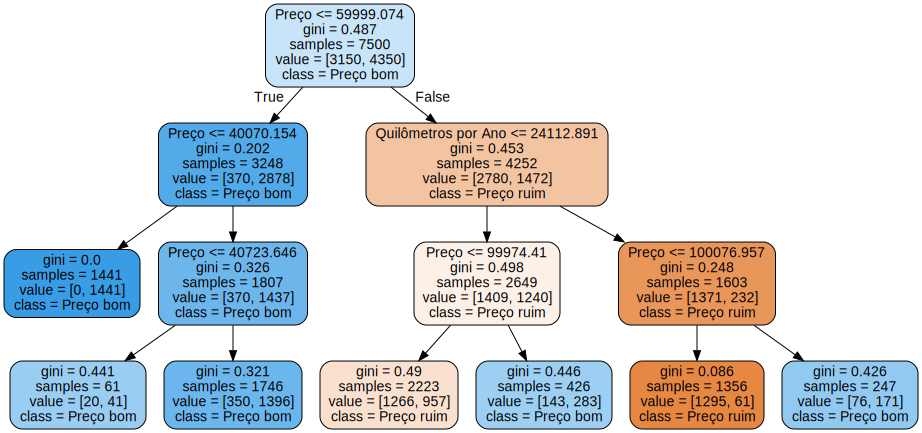

In [27]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns

# Exportar e formatar bonitinho
dot_data = export_graphviz(modelo, 
                           feature_names = features,
                           filled = True,
                           rounded = True,
                           class_names = ["Preço ruim", "Preço bom"])
grafico = graphviz.Source(dot_data)
grafico